# Homography

Some usecases are modifying the image to one where the plane is different/ to one where the perspective is different.

The homography matrix has 8 degrees of freedom generally as $i$ is the scaling factor.
$$
H = 
\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix}
$$

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
!ls 'drive/My Drive/Images/'

***Excercise!***

1. Map the book in the image to a rectangular window of (width, height)as (300, 400)

2. Alight the book to the one on the table usinf the point arrays given.

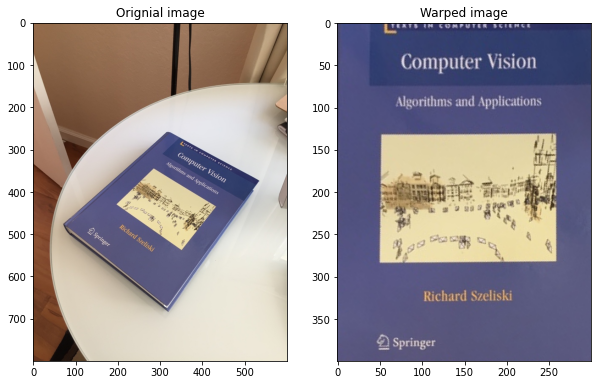

In [29]:
book1 = cv2.imread('drive/My Drive/Images/book1.jpg')
height, width = 400, 300
destination = np.zeros((height, width, 3))

pointsDest = np.array([[0,0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]])

# Clockwise points of corners of the book in the original image
pointsSrc =  np.load('drive/My Drive/Images/Points.npy')

H, status = cv2.findHomography(pointsSrc, pointsDest)
destination = cv2.warpPerspective(book1, H, (width,height))

figure, ax = plt.subplots(1, 2, figsize=(10,8))
ax[0].imshow(cv2.cvtColor(book1,cv2.COLOR_BGR2RGB))
ax[0].set_title('Orignial image')
ax[1].imshow(cv2.cvtColor(destination,cv2.COLOR_BGR2RGB))
ax[1].set_title('Warped image')
plt.show()

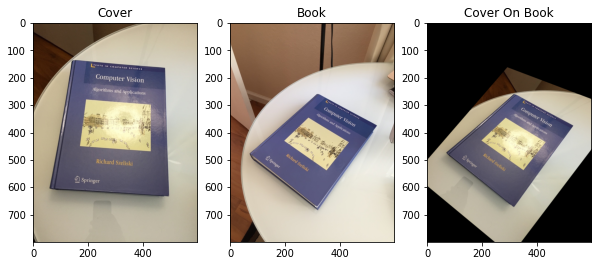

In [28]:
book2 = cv2.imread('drive/My Drive/Images/book2.jpg')
height, width, channels = book2.shape
pointsSrc = np.array([[141, 131], [480, 159], [493, 630],[64, 601]], dtype=float)
pointsDest = np.array([[318, 256],[534, 372],[316, 670],[73, 473]], dtype=float)

H, status = cv2.findHomography(pointsSrc, pointsDest)
final = cv2.warpPerspective(book2, H, (width,height))

figure, ax = plt.subplots(1, 3, figsize=(10,8))
ax[0].imshow(cv2.cvtColor(book2, cv2.COLOR_BGR2RGB))
ax[0].set_title('Cover')
ax[1].imshow(cv2.cvtColor(book1, cv2.COLOR_BGR2RGB))
ax[1].set_title('Book')
ax[2].imshow(cv2.cvtColor(final,cv2.COLOR_BGR2RGB))
ax[2].set_title('Cover On Book')
plt.show()


### Panaroma Stitching

How would we get the corresponding points?

SIFT Matching
ORB Matching
And many more ...